In [1]:
# Libraries
library(mgcv) # gam(.)
library(fields) # quilt.plot(.)
# Read dataset
df <- read.csv("HornsRev.csv")
# Set Impact as factor
df$Impact <- as.factor(df$Impact)

Loading required package: nlme

This is mgcv 1.8-35. For overview type 'help("mgcv-package")'.

Warning message:
“package ‘fields’ was built under R version 4.1.1”
Loading required package: spam

Warning message:
“package ‘spam’ was built under R version 4.1.1”
Spam version 2.8-0 (2022-01-05) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridis

Warning message:
“package ‘viridis’ was built under R version 4.1.1”
Loading required package: viridisLite


Try help(fields) to get started.



Produce pre/post-impact spatial plots (using fields::quilt.plot(.)) of the observed data.

In [2]:
df$Impact <- as.factor(df$Impact)

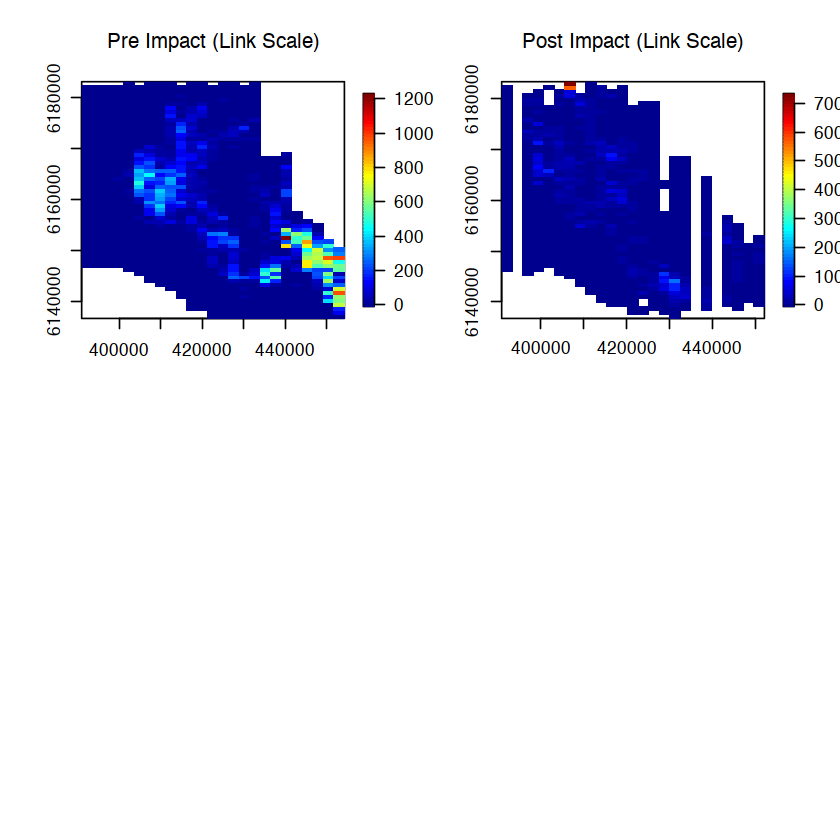

In [3]:
par(mfrow=c(2,2))
# Loop across all phases
for(phase in c(0,1)){
  fields::quilt.plot(df$XPos[which(df$Impact == phase)], 
                       df$YPos[which(df$Impact == phase)],
                       df$Nhat[which(df$Impact == phase)],
                       nrow=25, ncol=60,
                       #zlim=range(NhatPredLink$fit),
                       main=paste(ifelse(phase == 0, "Pre Impact (Link Scale)", "Post Impact (Link Scale)")))
}

Fit a quasi-Poisson penalised spline based GAM (mgcv::gam(.); use the default options) with a two
dimensional smoother for the spatial coordinates and a one dimensional smoother for Depth, whilst
including Impact (not as an interaction term for now). Print out a summary of the result and model,
which will be referred to as PRS_2D.

In [4]:
PRS_2D = mgcv::gam(Nhat ~ s(XPos, YPos) + s(Depth) + Impact,
    data=df, family=quasipoisson, offset=log(Area))

In [5]:
summary(PRS_2D)


Family: quasipoisson 
Link function: log 

Formula:
Nhat ~ s(XPos, YPos) + s(Depth) + Impact

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.44109    0.13661  -3.229  0.00124 ** 
Impact1      0.23830    0.01182  20.162  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                edf Ref.df     F p-value    
s(XPos,YPos) 29.000 29.000 462.0  <2e-16 ***
s(Depth)      7.308  7.706 131.1  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.0596   Deviance explained = 25.5%
GCV = 230.78  Scale est. = 55.167    n = 27854

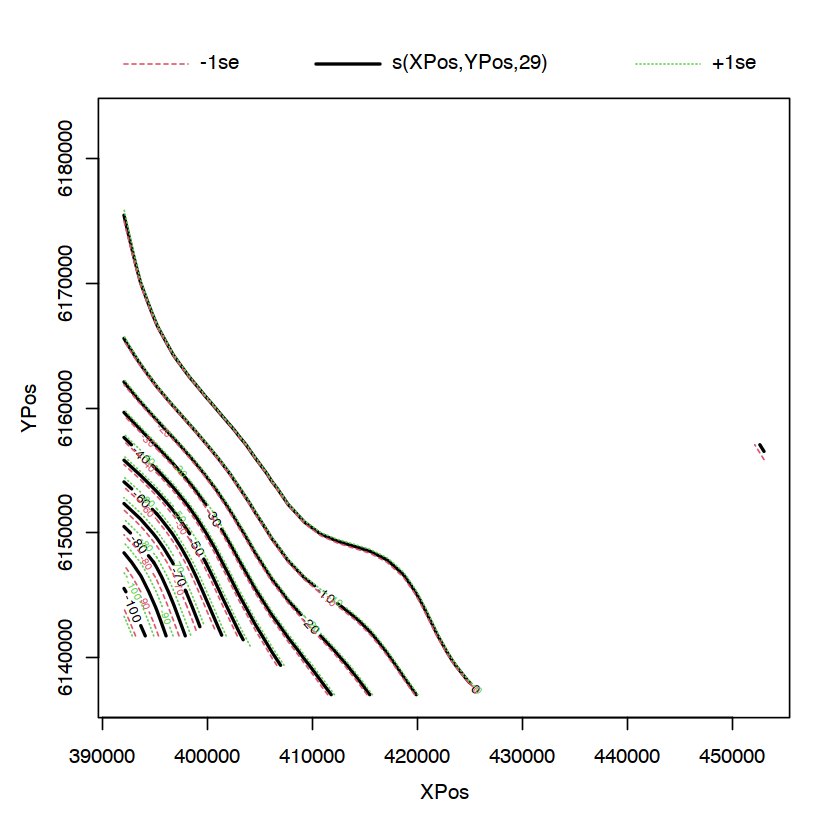

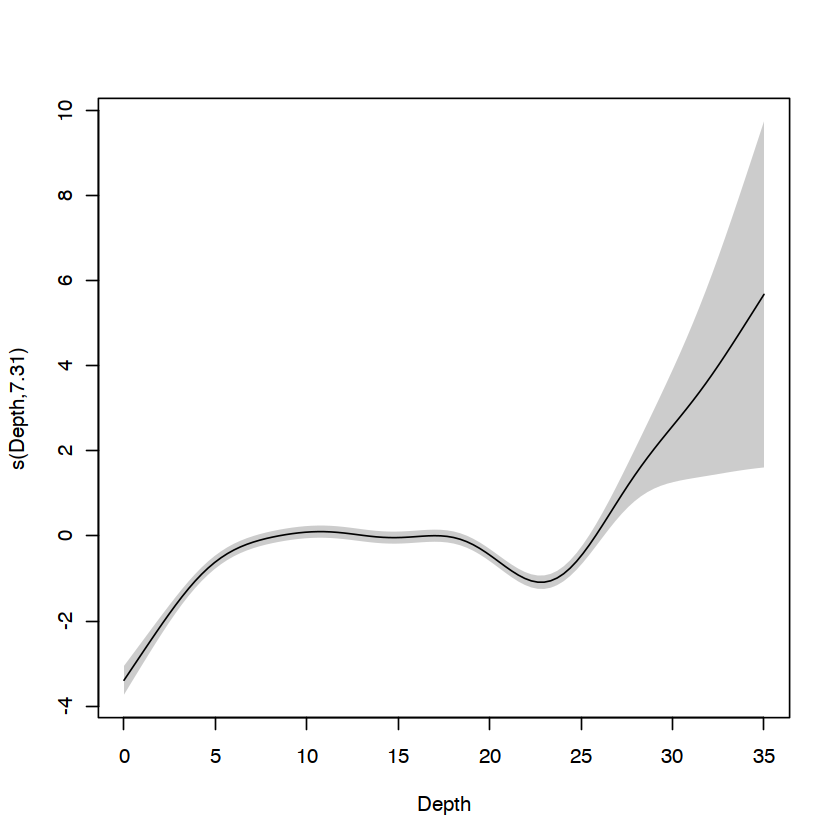

In [6]:
plot(PRS_2D, shade = T)

Use HornsRevPredictionData.csv to make pre/post-impact predictions on this fine grid using PRS_2D.
Produce a spatial plot of the results (both on the link and response scale; set the same 𝑧-scale range
(zlim) for pre and post-impact).

In [7]:
dfPred <- read.csv("HornsRevPredictionData.csv")
dfPred$Impact <- as.factor(dfPred$Impact)

In [38]:
dfPred

X,Area,Depth,XPos,YPos,Impact
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.25,14.59,442805.7,6137266,0
2,0.25,13.89,443305.7,6137266,0
3,0.25,13.43,443805.7,6137266,0
4,0.25,13.07,444305.7,6137266,0
5,0.25,13.11,444805.7,6137266,0
6,0.25,13.25,445305.7,6137266,0
7,0.25,13.39,445805.7,6137266,0
8,0.25,13.63,446305.7,6137266,0
9,0.25,14.41,446805.7,6137266,0


In [8]:
pred_link = predict(PRS_2D, newdata = dfPred, type = 'link')
pred_probs = predict(PRS_2D, newdata = dfPred, type = 'response', se=T)


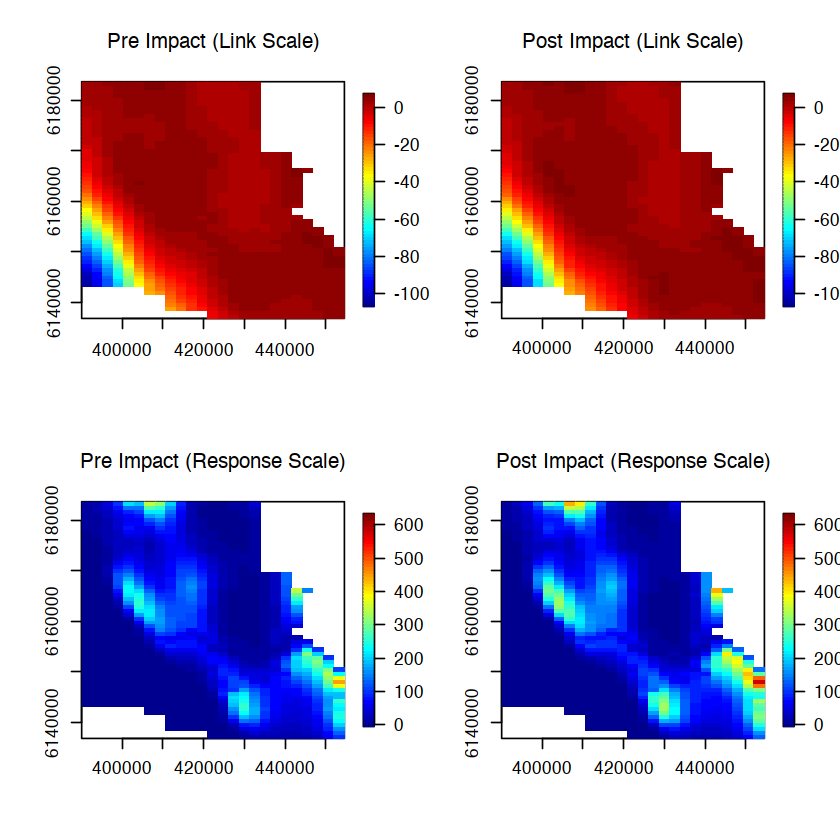

In [14]:
par(mfrow=c(2,2))
for(phase in c(0,1)){
  bwant = dfPred$Impact %in% phase
  fields::quilt.plot(dfPred$XPos[bwant], 
                       dfPred$YPos[bwant],
                       pred_link[bwant],
                       nrow=25, ncol=60,
                       zlim = range(pred_link),
                       main=paste(ifelse(phase == 0, "Pre Impact (Link Scale)", "Post Impact (Link Scale)")))
}

for(phase in c(0,1)){
  bwant = dfPred$Impact %in% phase
  fields::quilt.plot(dfPred$XPos[bwant], 
                       dfPred$YPos[bwant],
                       pred_probs$fit[bwant],
                       nrow=25, ncol=60,
                       zlim = range(pred_probs$fit),
                       main=paste(ifelse(phase == 0, "Pre Impact (Response Scale)", "Post Impact (Response Scale)")))
}

Fit a similar model to PRS_2D, but now add Impact as an interaction term in the two dimensional
spatial smoother (leave everything else the same). Print out a summary of the resultant model, which
will be referred to as PRS_2DInt.

In [10]:
PRS_2DInt = mgcv::gam(Nhat ~ s(XPos, YPos, by=Impact) + s(Depth) + Impact,
    data=df, family=quasipoisson, offset=log(Area))

In [36]:
summary(PRS_2DInt)


Family: quasipoisson 
Link function: log 

Formula:
Nhat ~ s(XPos, YPos, by = Impact) + s(Depth) + Impact

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.4093     0.3746  -14.44   <2e-16 ***
Impact1       6.6118     0.3859   17.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                        edf Ref.df     F p-value    
s(XPos,YPos):Impact0 28.945 28.999 377.4  <2e-16 ***
s(XPos,YPos):Impact1 28.878 28.990 373.2  <2e-16 ***
s(Depth)              7.939  8.073 139.1  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.118   Deviance explained =   36%
GCV = 198.62  Scale est. = 60.11     n = 27854

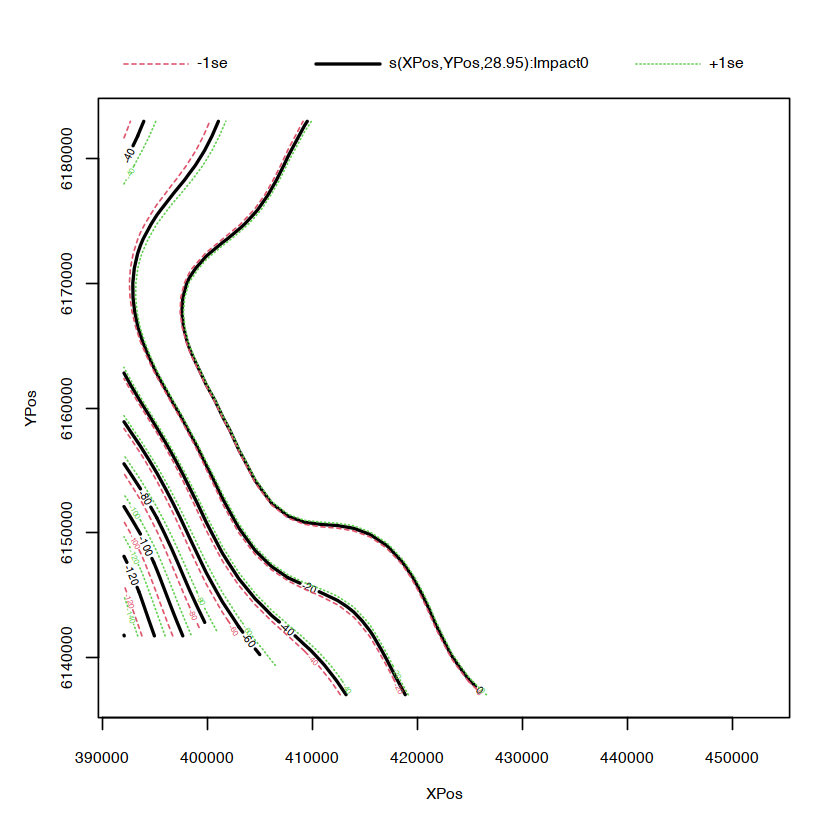

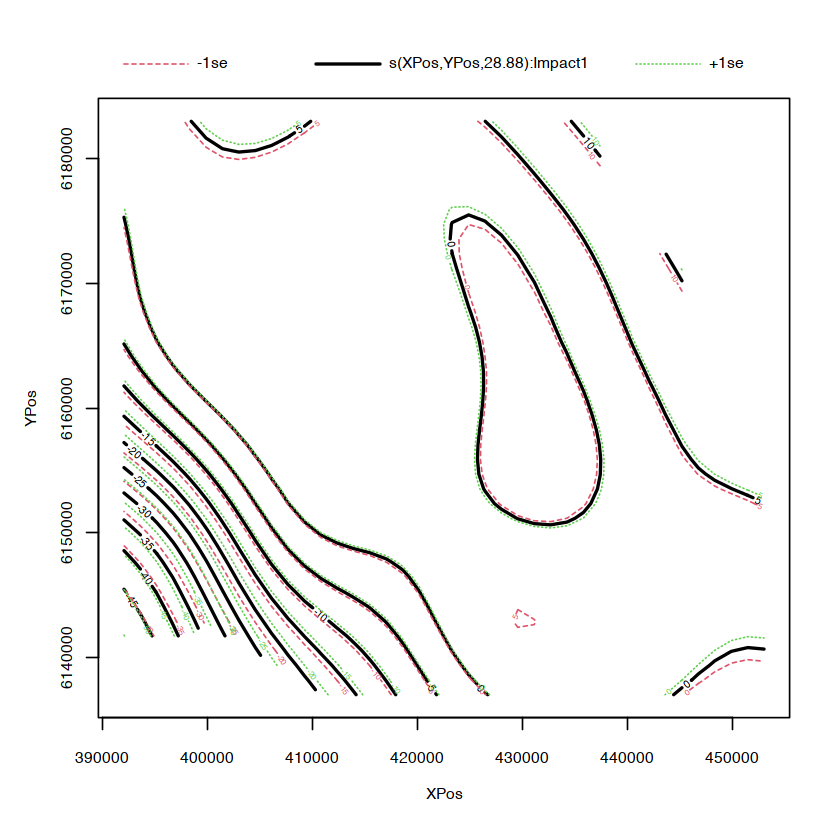

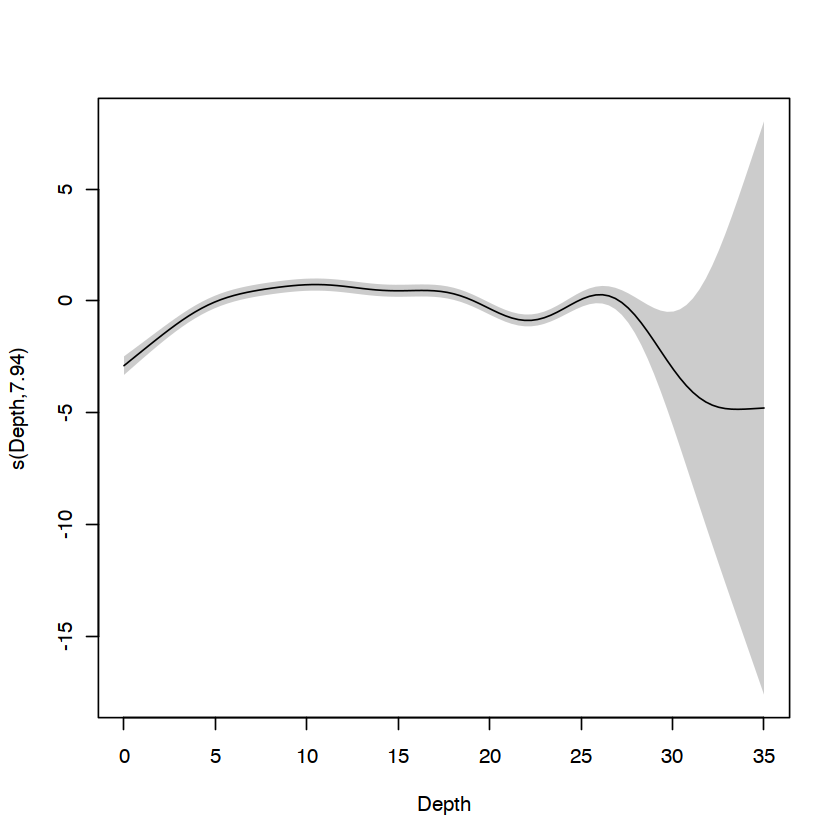

In [11]:
plot(PRS_2DInt, shade=T)

In [12]:
pred_linkINT = predict(PRS_2DInt, newdata = dfPred, type = 'link')
pred_probsINT = predict(PRS_2DInt, newdata = dfPred, type = 'response', se=T)

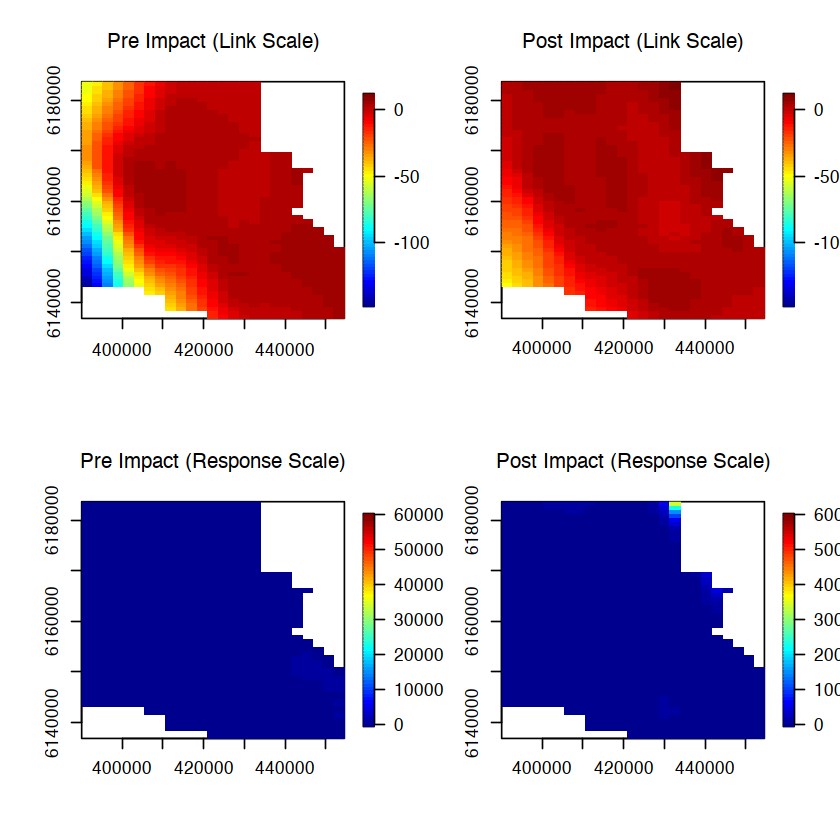

In [15]:
par(mfrow=c(2,2))
for(phase in c(0,1)){
  bwant = dfPred$Impact %in% phase
  fields::quilt.plot(dfPred$XPos[bwant], 
                       dfPred$YPos[bwant],
                       pred_linkINT[bwant],
                       nrow=25, ncol=60,
                       zlim = range(pred_linkINT),
                       main=paste(ifelse(phase == 0, "Pre Impact (Link Scale)", "Post Impact (Link Scale)")))
}

for(phase in c(0,1)){
  bwant = dfPred$Impact %in% phase
  fields::quilt.plot(dfPred$XPos[bwant], 
                       dfPred$YPos[bwant],
                       pred_probsINT$fit[bwant],
                       nrow=25, ncol=60,
                       zlim = range(pred_probsINT$fit),
                       main=paste(ifelse(phase == 0, "Pre Impact (Response Scale)", "Post Impact (Response Scale)")))
}

Plot the locations of the observation points and the fine prediction grid (HornsRevPredictionData.csv).

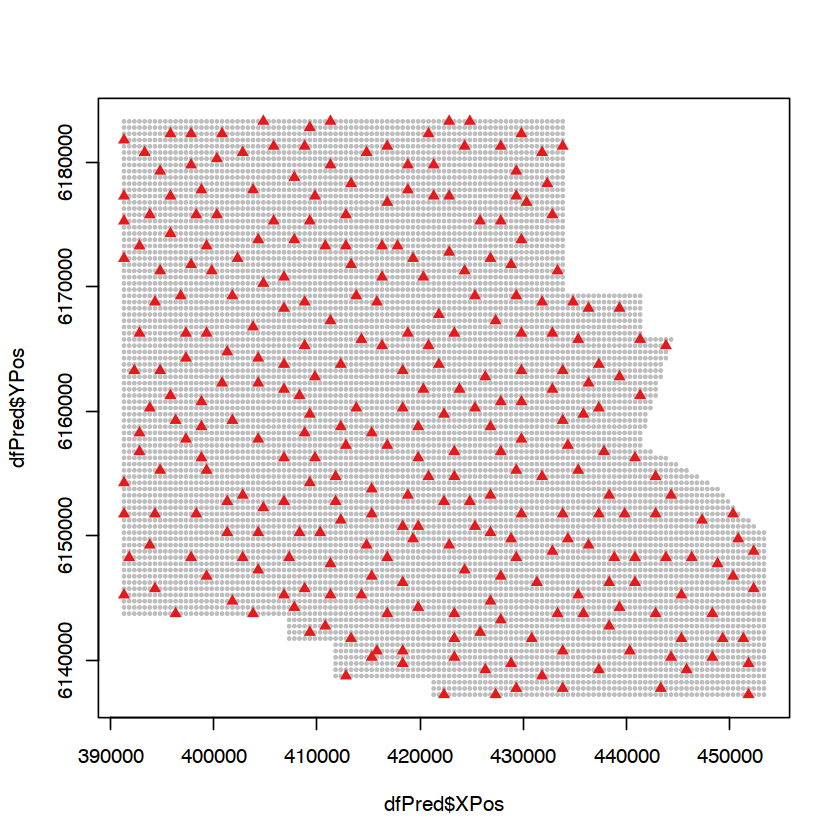

In [22]:
library(MRSea)
knotGrid = MRSea::getKnotgrid(coordData = cbind(dfPred$XPos,dfPred$YPos),
                              numKnots = 300,
                              plot = FALSE)
plot(dfPred$XPos, dfPred$YPos, col="grey", pch=19, cex=0.2)
points(knotGrid[, 1], knotGrid[, 2], pch=17, col="#e41a1c")

Try increasing (set k=15) and decreasing (set k=40) the limit on the degrees of freedom for the two
dimensional spatial smoother (leave everything else the same; keep the interaction term). Print out a
summary of the resultant models.


In [39]:
summary(PRS_2D)


Family: quasipoisson 
Link function: log 

Formula:
Nhat ~ s(XPos, YPos, by = Impact) + s(Depth) + Impact

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.4093     0.3746  -14.44   <2e-16 ***
Impact1       6.6118     0.3859   17.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                        edf Ref.df     F p-value    
s(XPos,YPos):Impact0 28.945 28.999 377.4  <2e-16 ***
s(XPos,YPos):Impact1 28.878 28.990 373.2  <2e-16 ***
s(Depth)              7.939  8.073 139.1  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.118   Deviance explained =   36%
GCV = 198.62  Scale est. = 60.11     n = 27854

In [23]:
PRS_2DInt_knots15 = mgcv::gam(Nhat ~ s(XPos, YPos, by = Impact, k=15) + s(Depth) + Impact,
                   family = quasipoisson,
                   offset = log(Area),
                   data = df)
summary(PRS_2DInt_knots15)
PRS_2DInt_knots40 = mgcv::gam(Nhat ~ s(XPos, YPos, by = Impact, k=40) + s(Depth) + Impact,
                   family = quasipoisson,
                   offset = log(Area),
                   data = df)
summary(PRS_2DInt_knots40)


Family: quasipoisson 
Link function: log 

Formula:
Nhat ~ s(XPos, YPos, by = Impact, k = 15) + s(Depth) + Impact

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.9636     0.1816  -5.305 1.13e-07 ***
Impact1       2.6179     0.1088  24.065  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                        edf Ref.df     F p-value    
s(XPos,YPos):Impact0 13.990 14.000 821.6  <2e-16 ***
s(XPos,YPos):Impact1 13.987 14.000 532.4  <2e-16 ***
s(Depth)              8.063  8.214 244.3  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.0808   Deviance explained = 31.1%
GCV = 213.49  Scale est. = 59.986    n = 27854


Family: quasipoisson 
Link function: log 

Formula:
Nhat ~ s(XPos, YPos, by = Impact, k = 40) + s(Depth) + Impact

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.0595     0.4661  -6.565 5.31e-11 ***
Impact1       4.2562     0.4942   8.612  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                        edf Ref.df     F p-value    
s(XPos,YPos):Impact0 38.577 38.957 297.0  <2e-16 ***
s(XPos,YPos):Impact1 38.883 38.991 347.1  <2e-16 ***
s(Depth)              6.919  7.406 112.2  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.138   Deviance explained = 38.5%
GCV = 191.26  Scale est. = 60.179    n = 27854

In [28]:
pred_link15 = predict(PRS_2DInt_knots15, newdata = dfPred, type = 'link')
pred_probs15 = predict(PRS_2DInt_knots15, newdata = dfPred, type = 'response', se="T")

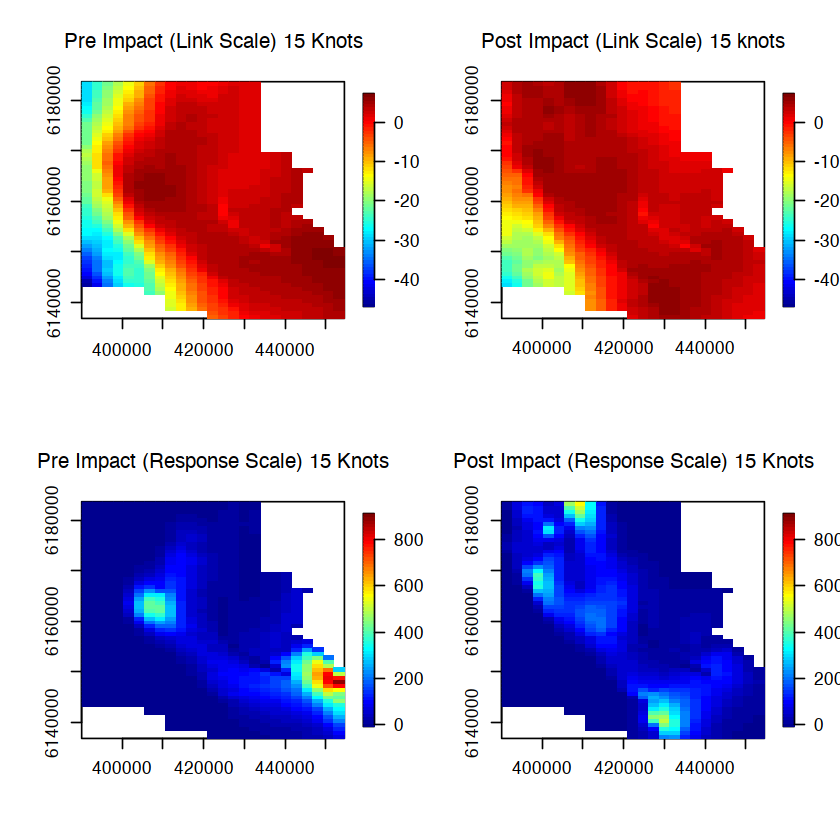

In [31]:
par(mfrow=c(2,2))
for(phase in c(0,1)){
  bwant = dfPred$Impact %in% phase
  fields::quilt.plot(dfPred$XPos[bwant], 
                       dfPred$YPos[bwant],
                       pred_link15[bwant],
                       nrow=25, ncol=60,
                       zlim = range(pred_link15),
                       main=paste(ifelse(phase == 0, "Pre Impact (Link Scale) 15 Knots", "Post Impact (Link Scale) 15 knots")))
}

for(phase in c(0,1)){
  bwant = dfPred$Impact %in% phase
  fields::quilt.plot(dfPred$XPos[bwant], 
                       dfPred$YPos[bwant],
                       pred_probs15$fit[bwant],
                       nrow=25, ncol=60,
                       zlim = range(pred_probs15$fit),
                       main=paste(ifelse(phase == 0, "Pre Impact (Response Scale) 15 Knots", "Post Impact (Response Scale) 15 Knots")))
}

In [33]:
pred_link40 = predict(PRS_2DInt_knots40, newdata = dfPred, type = 'link')
pred_probs40 = predict(PRS_2DInt_knots40, newdata = dfPred, type = 'response', se="T")

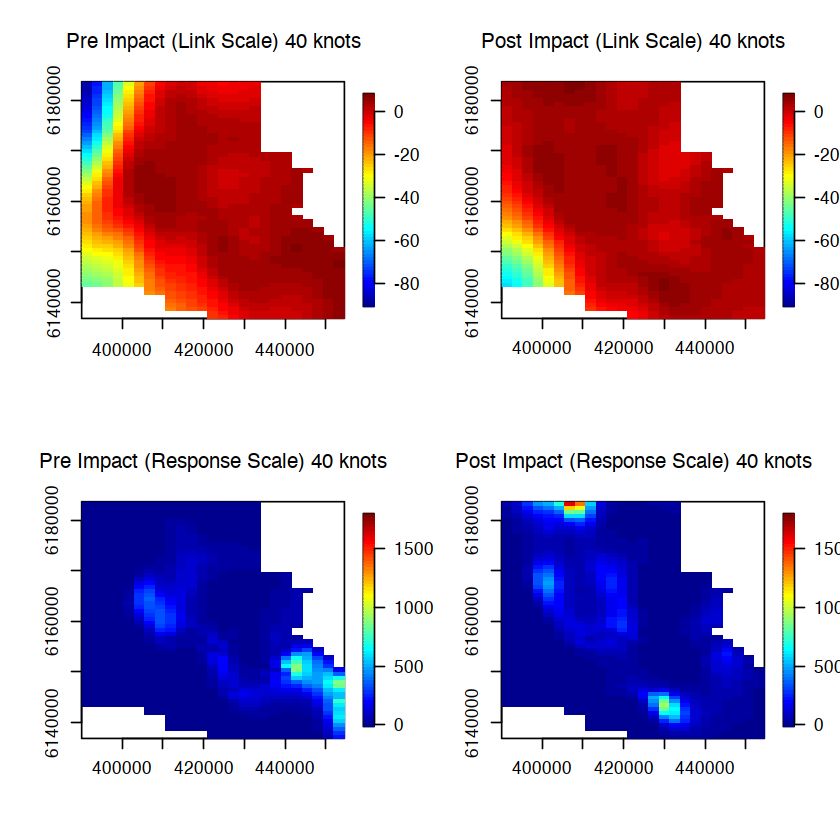

In [35]:
par(mfrow=c(2,2))
for(phase in c(0,1)){
  bwant = dfPred$Impact %in% phase
  fields::quilt.plot(dfPred$XPos[bwant], 
                       dfPred$YPos[bwant],
                       pred_link40[bwant],
                       nrow=25, ncol=60,
                       zlim = range(pred_link40),
                       main=paste(ifelse(phase == 0, "Pre Impact (Link Scale) 40 knots", "Post Impact (Link Scale) 40 knots")))
}

for(phase in c(0,1)){
  bwant = dfPred$Impact %in% phase
  fields::quilt.plot(dfPred$XPos[bwant], 
                       dfPred$YPos[bwant],
                       pred_probs40$fit[bwant],
                       nrow=25, ncol=60,
                       zlim = range(pred_probs40$fit),
                       main=paste(ifelse(phase == 0, "Pre Impact (Response Scale) 40 knots", "Post Impact (Response Scale) 40 knots")))
}